<a href="https://colab.research.google.com/github/jay0010/LGMVIP-DataScience/blob/main/globalterrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAME : JAYAN KOKRU**
# **LETS GROW MORE VIRTUAL INTERNSHIP PROGRAM(VIP)**

# **INTERMEDIATE LEVEL TASK:**
 
# **Exploratory Data Analysis on Dataset - Terrorism:**

## **As a security/defense analyst, try to find out the hot zone of terrorism.You can choose any of the tool of your choice(Python/R/Tableau/PowerBI/Excel/SAP/SAS).**

Dataset: https://bit.ly/2TK5Xn5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving globalterrorismdb_0718dist.csv to globalterrorismdb_0718dist (1).csv


MessageError: ignored

In [ ]:
df = pd.read_csv("globalterror.csv",encoding='latin1')

In [ ]:
df.shape

(1210, 135)

In [ ]:
df.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'Country','region_txt':'Region','provstate':'State','natlty1_txt':'nationality_of_target','weaptype1_txt':'WeaponType','nkill':'killed','nwound':'wounded'},inplace=True)

In [ ]:
df.head()

,eventid,year,month,day,approxdate,extended,resolution,country,Country,region,Region,State,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,killed,nkillus,nkillter,wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Columns: 135 entries, eventid to related
dtypes: float64(79), int64(7), object(49)
memory usage: 1.2+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,1210.0,1.970593e+11,6.215254e+07,1.970000e+11,1.970053e+11,1.970112e+11,1.971061e+11,1.972032e+11
year,1210.0,1.970535e+03,6.281527e-01,1.970000e+03,1.970000e+03,1.970000e+03,1.971000e+03,1.972000e+03
month,1210.0,5.662810e+00,3.295036e+00,0.000000e+00,3.000000e+00,5.000000e+00,8.000000e+00,1.200000e+01
day,1210.0,1.478264e+01,9.185877e+00,0.000000e+00,6.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,1210.0,2.975207e-02,1.699728e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
nreleased,44.0,1.995455e+01,4.923081e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.250000e+00,1.870000e+02
INT_LOG,1209.0,-4.604632e+00,4.553673e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_IDEO,1209.0,-4.496278e+00,4.680366e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_MISC,1209.0,2.779156e-01,7.572062e-01,-9.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df.isnull().sum()

eventid          0
year             0
month            0
day              0
approxdate    1198
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       1084
Length: 135, dtype: int64

In [ ]:
df['year'].value_counts()

1970    651
1971    471
1972     88
Name: year, dtype: int64

In [ ]:
df['month'].value_counts()

3     139
4     136
5     129
2     127
1     120
7      93
8      89
6      85
10     82
11     80
9      79
12     49
0       2
Name: month, dtype: int64

In [ ]:
df['day'].value_counts()

6     60
1     54
22    51
15    49
4     47
9     45
27    44
2     44
29    42
23    41
11    41
5     41
8     39
14    38
21    38
24    38
7     36
17    36
16    36
28    36
30    35
20    35
12    34
3     32
0     30
18    30
10    29
13    29
25    29
19    27
26    27
31    17
Name: day, dtype: int64

In [ ]:
df['day'].value_counts()

6     60
1     54
22    51
15    49
4     47
9     45
27    44
2     44
29    42
23    41
11    41
5     41
8     39
14    38
21    38
24    38
7     36
17    36
16    36
28    36
30    35
20    35
12    34
3     32
0     30
18    30
10    29
13    29
25    29
19    27
26    27
31    17
Name: day, dtype: int64

In [ ]:
df['Country'].value_counts()

United States               740
United Kingdom              130
Turkey                       48
Uruguay                      41
West Germany (FRG)           36
Spain                        33
Argentina                    29
Iran                         19
East Germany (GDR)           16
Philippines                  15
Jordan                       14
Brazil                       10
Venezuela                     6
Italy                         6
Netherlands                   5
Dominican Republic            5
Guatemala                     5
Switzerland                   4
Ethiopia                      4
Greece                        4
Ireland                       3
Bolivia                       3
Egypt                         3
Lebanon                       2
Cambodia                      2
Australia                     2
Canada                        2
Sweden                        2
Mexico                        2
Japan                         2
South Yemen                   1
India   

In [ ]:
df['nationality_of_target'].value_counts()

United States                       813
Northern Ireland                     69
Great Britain                        63
Germany                              43
Spain                                29
Uruguay                              23
Argentina                            20
Iran                                 13
Israel                               11
Soviet Union                         10
Jordan                                9
Turkey                                8
Yugoslavia                            7
Dominican Republic                    6
Portugal                              6
Venezuela                             6
Philippines                           5
Puerto Rico                           5
Egypt                                 4
International                         3
Switzerland                           3
South Africa                          3
Brazil                                3
Japan                                 3
Netherlands                           2


## **Total Number of Killings in each Region**

In [ ]:
killings_per_region=df.groupby(['Region'],as_index=False)['killed']
killings_per_region.sum()

,Region,killed
0,Australasia & Oceania,0.0
1,Central America & Caribbean,3.0
2,East Asia,25.0
3,Eastern Europe,26.0
4,Middle East & North Africa,9.0
5,North America,58.0
6,South America,17.0
7,South Asia,4.0
8,Southeast Asia,43.0
9,Sub-Saharan Africa,2.0


## **Maximum Number of killings in every region**

In [ ]:
killings_per_region.max()

,Region,killed
0,Australasia & Oceania,0.0
1,Central America & Caribbean,1.0
2,East Asia,25.0
3,Eastern Europe,26.0
4,Middle East & North Africa,3.0
5,North America,4.0
6,South America,3.0
7,South Asia,4.0
8,Southeast Asia,36.0
9,Sub-Saharan Africa,1.0


## **Total  of all the killings**

In [ ]:
df['killed'].sum()

438.0

## **Total number of all wounded cases**

In [ ]:
df['wounded'].sum()

534.0

## **Total Casualities**

In [ ]:
df['casualities']=df['killed']+df['wounded']
df['casualities'].sum()

774.0

## **Total number of all casualities according to the region**

In [ ]:
df1=df.groupby('Region')['casualities'].sum()
df2=df1.to_frame()
df2.reset_index()

,Region,casualities
0,Australasia & Oceania,0.0
1,Central America & Caribbean,3.0
2,East Asia,0.0
3,Eastern Europe,26.0
4,Middle East & North Africa,28.0
5,North America,287.0
6,South America,22.0
7,South Asia,24.0
8,Southeast Asia,66.0
9,Sub-Saharan Africa,2.0


## **Casuality count according to Year and Region**


In [ ]:
region_and_yearwise_casualitycount=df.groupby(['Region', 'year'])['casualities'].count().head()
region_and_yearwise_casualitycount

Region                       year
Australasia & Oceania        1970    1
                             1971    1
Central America & Caribbean  1970    6
                             1971    3
                             1972    1
Name: casualities, dtype: int64

## **Plot of Casualtity Count according to the Year and Region**

Text(0, 0.5, 'Casualities')

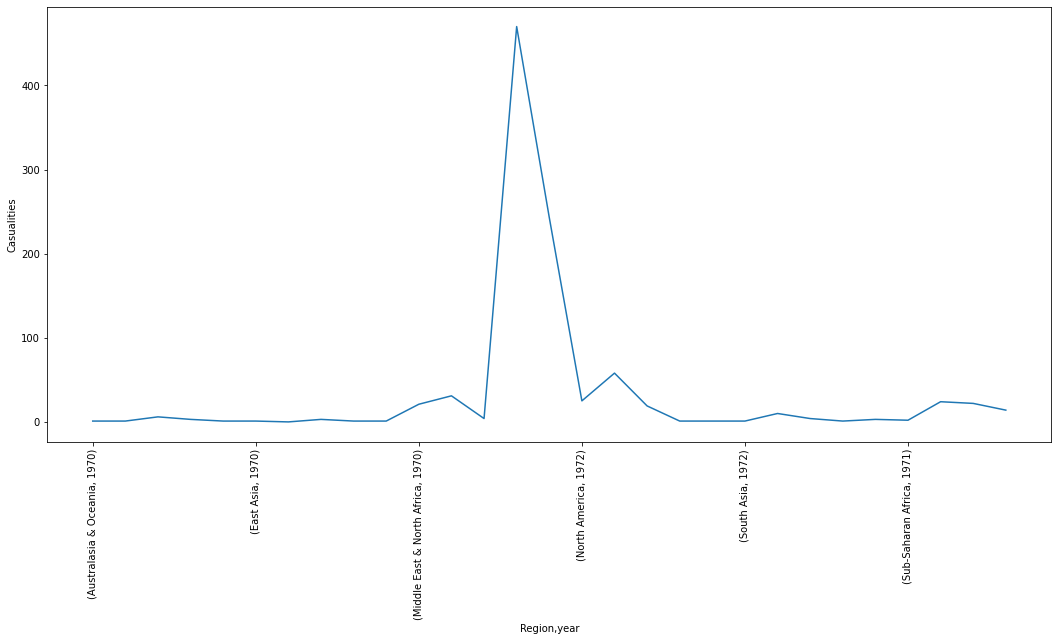

In [ ]:
plt.subplots(figsize=(18,8))
df.groupby(['Region', 'year']).count()['casualities'].plot()
plt.xticks(rotation=90)
plt.ylabel("Casualities")

## **60 of the most worst Terrorist attacks**



In [ ]:
df1=df.sort_values(by='casualities',ascending=False)[:60]
worst=df1.pivot_table(index='Country',columns='year',values='casualities')
worst.fillna(0,inplace=True)

In [ ]:
worst.head()

year,1970,1971,1972
Country,,,
Argentina,2.0,3.0,0.0
Cambodia,0.0,12.0,0.0
Czechoslovakia,0.0,0.0,26.0
Egypt,2.0,0.0,0.0
Iran,0.0,3.0,0.0


### Visual Check  of the Null values in the data 



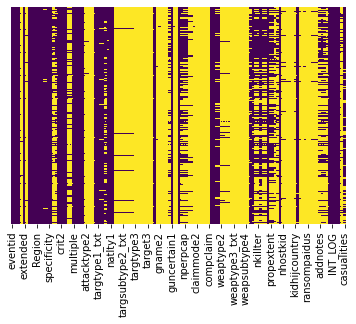

In [ ]:
sns.heatmap(df.isnull() , yticklabels=False , cbar=False , cmap='viridis')

### **Rows where atleast one column value is missing**

In [ ]:
missing=df[df.isnull().any(axis=1)]
missing.shape

(1210, 136)

In [ ]:
df.shape

(1210, 136)

### **Description of Terrorist Attacks**

In [ ]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['killed'].max(),'that took place in',df.loc[df['killed'].idxmax()].Country)
print("Nationality of the maximally targetted group is:", df['nationality_of_target'].value_counts().index[0])

Country with Highest Terrorist Attacks: United States
Regions with Highest Terrorist Attacks: North America
Maximum people killed in an attack are: 47.0 that took place in Switzerland
Nationality of the maximally targetted group is: United States


### Number of Weapons used 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


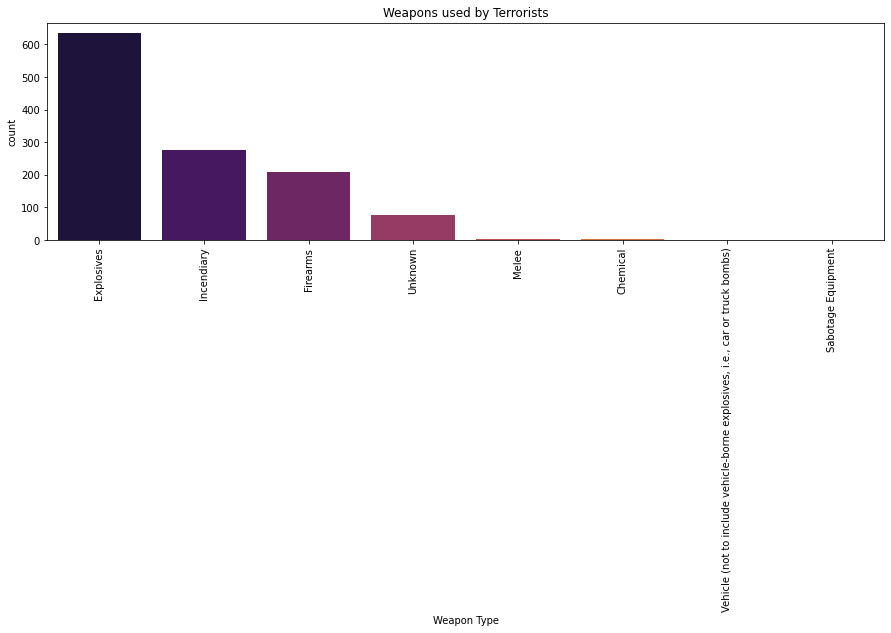

In [ ]:
plt.subplots(figsize=(15,4))
sns.countplot('WeaponType',data=df,palette='inferno',order=df['WeaponType'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Weapon Type')
plt.title('Weapons used by Terrorists')
plt.show()

### **Number of most number of the deaths that were not due to Suicide Attempts.**

0.0    1209
Name: suicide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Suicide Outcome')

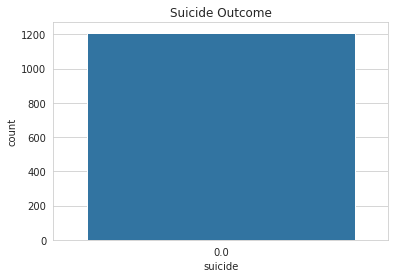

In [ ]:
sns.set_style('whitegrid')
print(df.suicide.value_counts())
sns.countplot('suicide',data=df).set_title('Suicide Outcome')

### Count of most number of the successful attacks 

1.0    1039
0.0     170
Name: success, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Success Outcome')

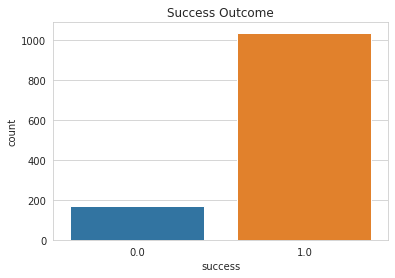

In [ ]:
sns.set_style('whitegrid')
print(df.success.value_counts())
sns.countplot('success',data=df).set_title('Success Outcome')

### **Most attacks didn't happen for 24 hours.**





0    1174
1      36
Name: extended, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Success Outcome')

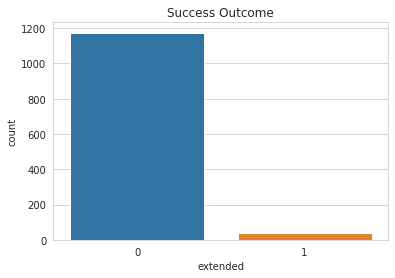

In [ ]:
sns.set_style('whitegrid')
print(df.extended.value_counts())
sns.countplot('extended',data=df).set_title('Success Outcome')

### **The total number of kills that vary with increase in any year if the people killed were involved in an encounter after more than 24 hours**

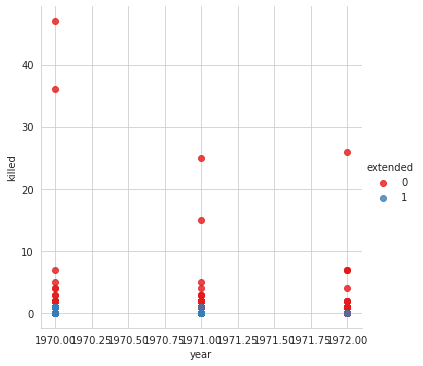

In [ ]:
sns.lmplot(x='year',y='killed',data=df,fit_reg=False,hue='extended',legend=True,palette="Set1")

### **Total  number of times any country has been attacked compared to the killings in that country.**

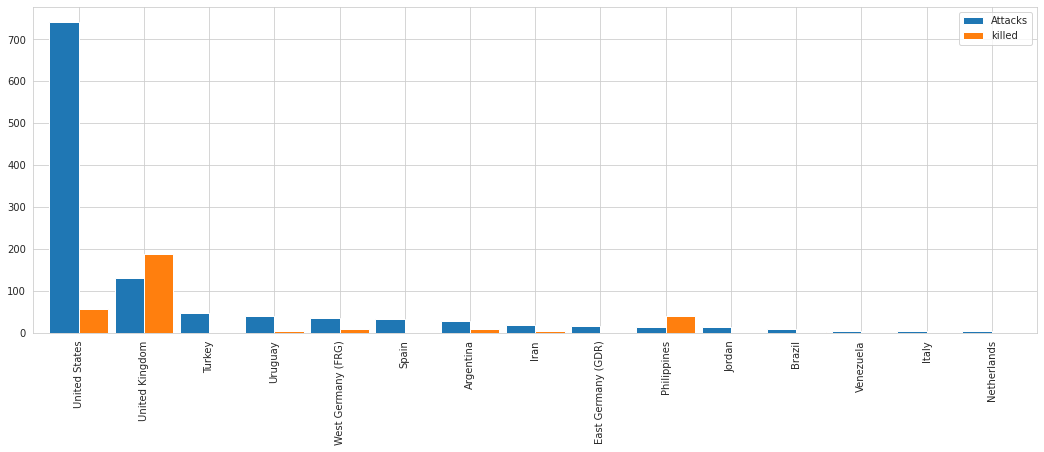

In [ ]:
count=df['Country'].value_counts()[:15].to_frame()
count.columns=['Attacks']
data=df.groupby('Country')['killed'].sum().to_frame()
count.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### **Countries most affected by terrorist attacks**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


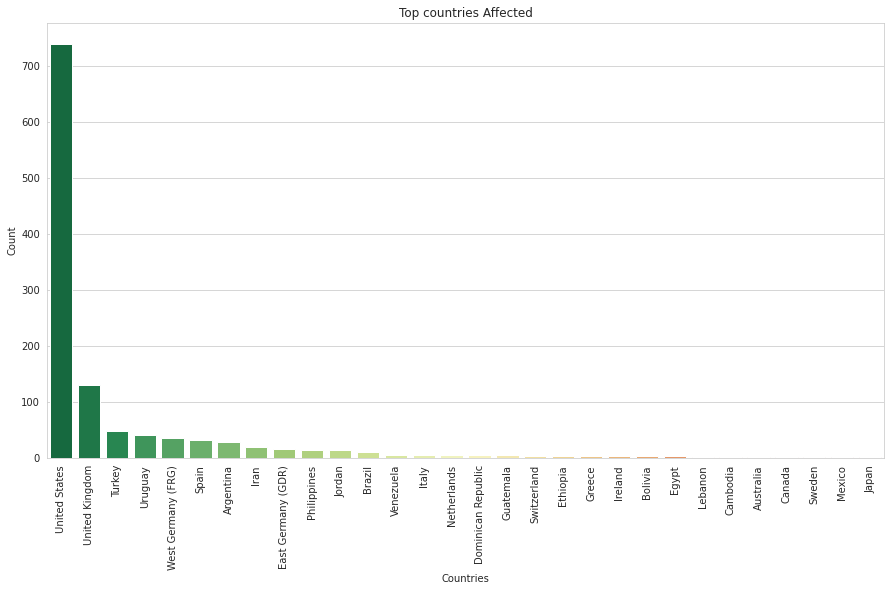

In [ ]:
plt.subplots(figsize=(15,8))
sns.barplot(df['Country'].value_counts()[:30].index,df['Country'].value_counts()[:30].values,palette='RdYlGn_r')
plt.title('Top countries Affected')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

### * Total Number Of Terrorist Activities Every Year**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


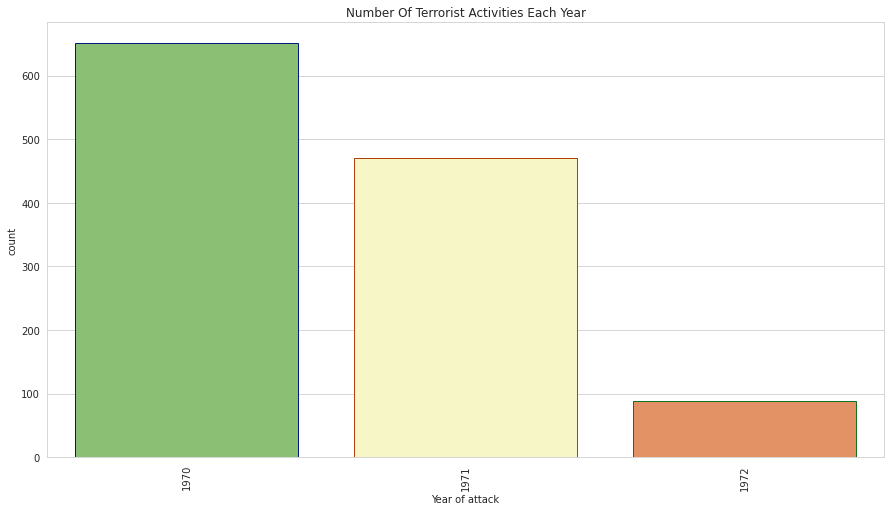

In [ ]:
plt.subplots(figsize=(15,8))
sns.countplot('year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

### **Total number Of Terrorist Activities By Every Region**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


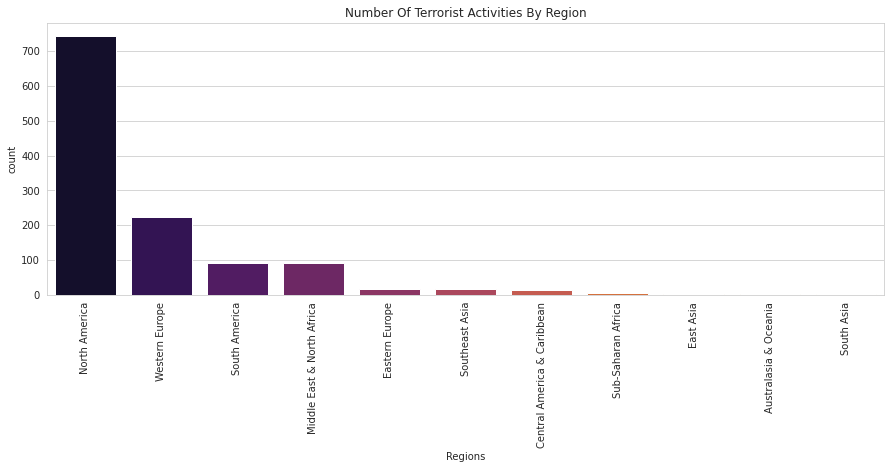

In [ ]:
plt.subplots(figsize=(15,5))
sns.countplot('Region',data=df,palette='inferno',order=df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

### **Total number of Terrorist Activities by each region every year**

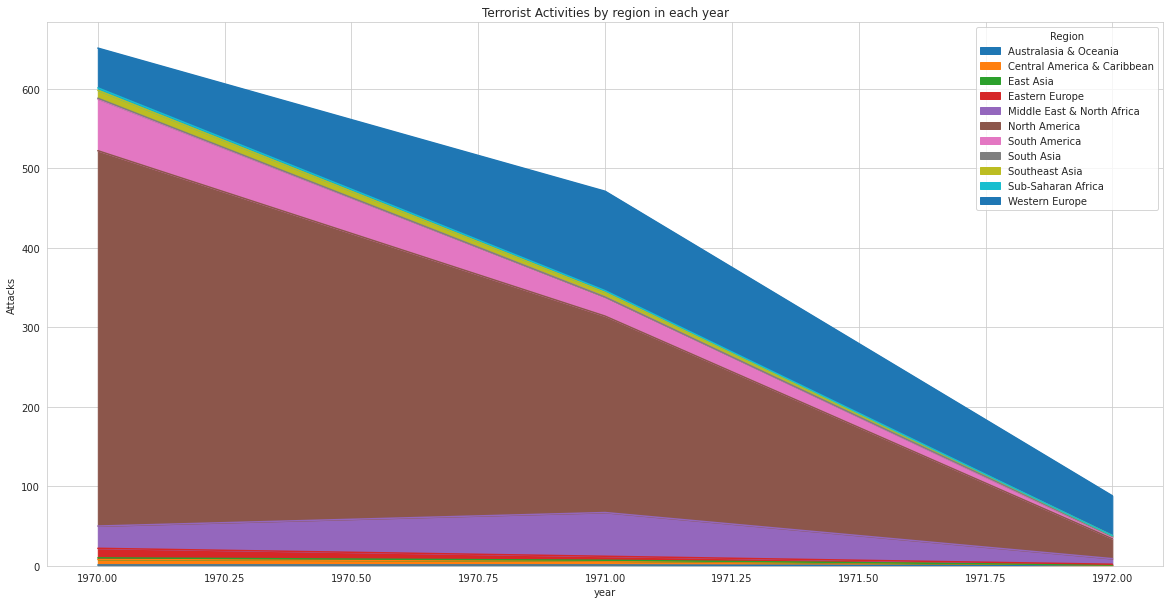

In [ ]:
df_region=pd.crosstab(df.year,df.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities by region in each year')
plt.ylabel('Attacks')
plt.show()